In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données brutes
df = pd.read_csv("../dags/data/historical/historical.csv", parse_dates=["datetime"])
print(f"Période des données: {df['datetime'].min()} à {df['datetime'].max()}")
print(f"Dimensions : {df.shape}\nVilles : {df['name'].unique().tolist()}")

Période des données: 2020-01-01 00:00:00 à 2025-06-29 00:00:00
Dimensions : (10035, 33)
Villes : ['Lyon', 'Paris', 'Toulouse', 'Marseille', 'Nice']


In [50]:
# Colonnes
print("Colonnes du dataset:")
print(df.columns.tolist())

Colonnes du dataset:
['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations', 'year', 'month', 'day_of_year', 'season']


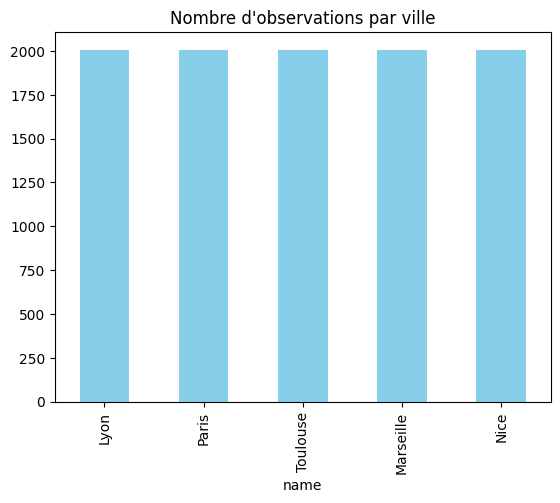

In [53]:
# Répartition des données par ville
df["name"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Nombre d'observations par ville");

In [45]:
# Aperçu des données
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunset,moonphase,conditions,description,icon,stations,year,month,day_of_year,season
0,Lyon,2020-01-01,0.5,-0.7,-0.1,0.5,-2.2,-0.8,-0.2,99.0,...,2020-01-01T17:06:21,0.20,Partially cloudy,Partly cloudy throughout the day.,fog,"07481099999,D2904,07480099999,07482099999",2020,1,1,Hiver
1,Lyon,2020-01-02,3.2,-0.8,0.5,3.2,-4.4,-0.7,0.0,96.6,...,2020-01-02T17:07:16,0.23,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"07481099999,D2904,07480099999,07482099999",2020,1,2,Hiver
2,Lyon,2020-01-03,9.8,1.7,5.1,9.8,-0.6,4.2,3.7,91.3,...,2020-01-03T17:08:13,0.25,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"07481099999,D2904,07480099999,07482099999",2020,1,3,Hiver
3,Lyon,2020-01-04,8.8,4.0,6.5,6.4,0.5,4.5,4.1,85.9,...,2020-01-04T17:09:13,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"07481099999,E8103,D2904,07480099999,07482099999",2020,1,4,Hiver
4,Lyon,2020-01-05,6.9,-0.3,3.2,4.6,-2.2,1.4,0.6,83.5,...,2020-01-05T17:10:14,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"07481099999,D2904,07480099999,07482099999",2020,1,5,Hiver


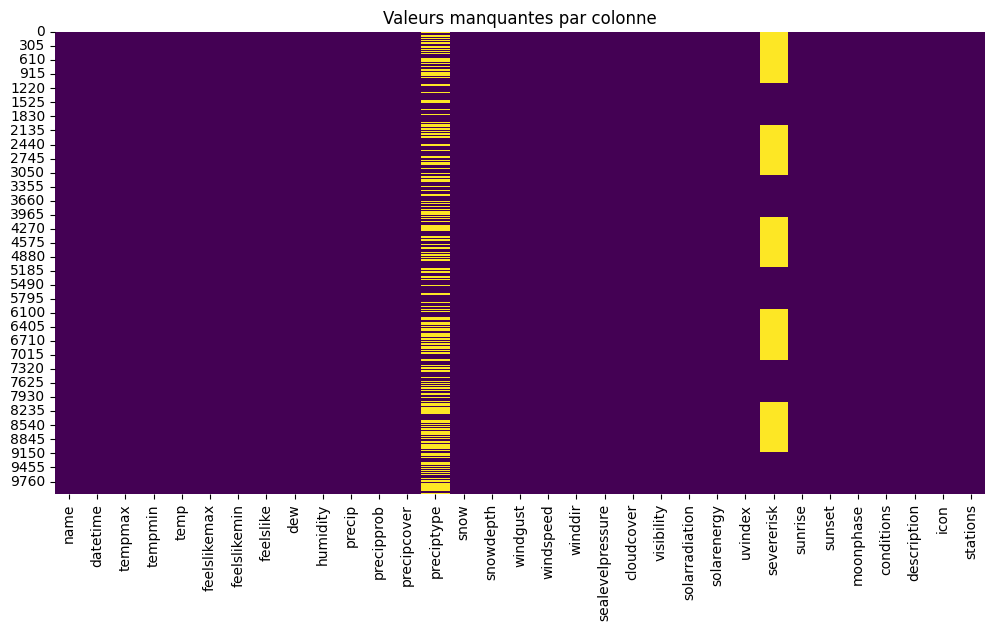

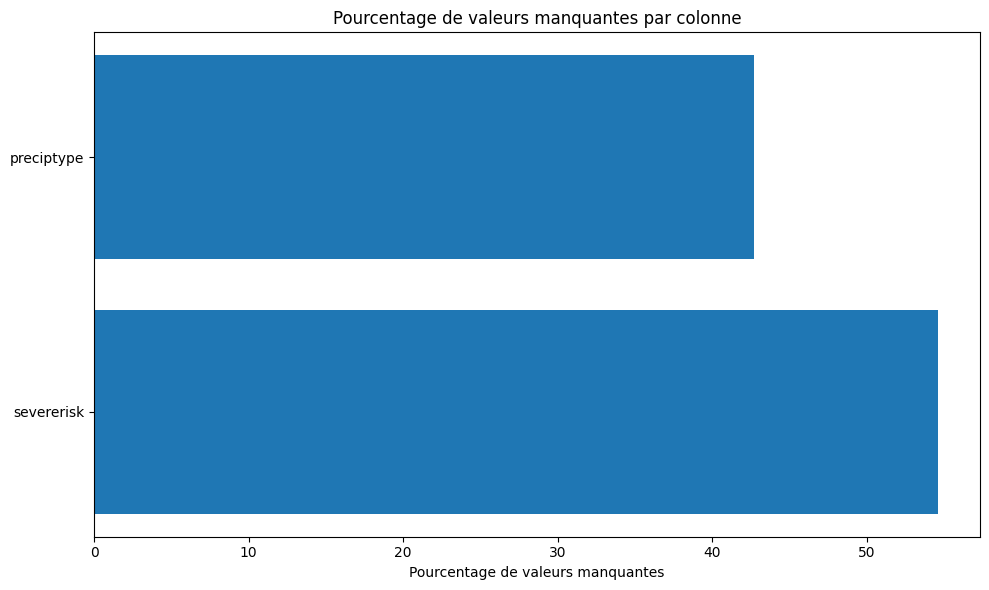

In [54]:
# Valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valeurs manquantes par colonne");

if not missing_with_values.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_with_values['Colonne'], missing_with_values['Pourcentage'])
    plt.xlabel('Pourcentage de valeurs manquantes')
    plt.title('Pourcentage de valeurs manquantes par colonne')
    plt.tight_layout()
    plt.show()

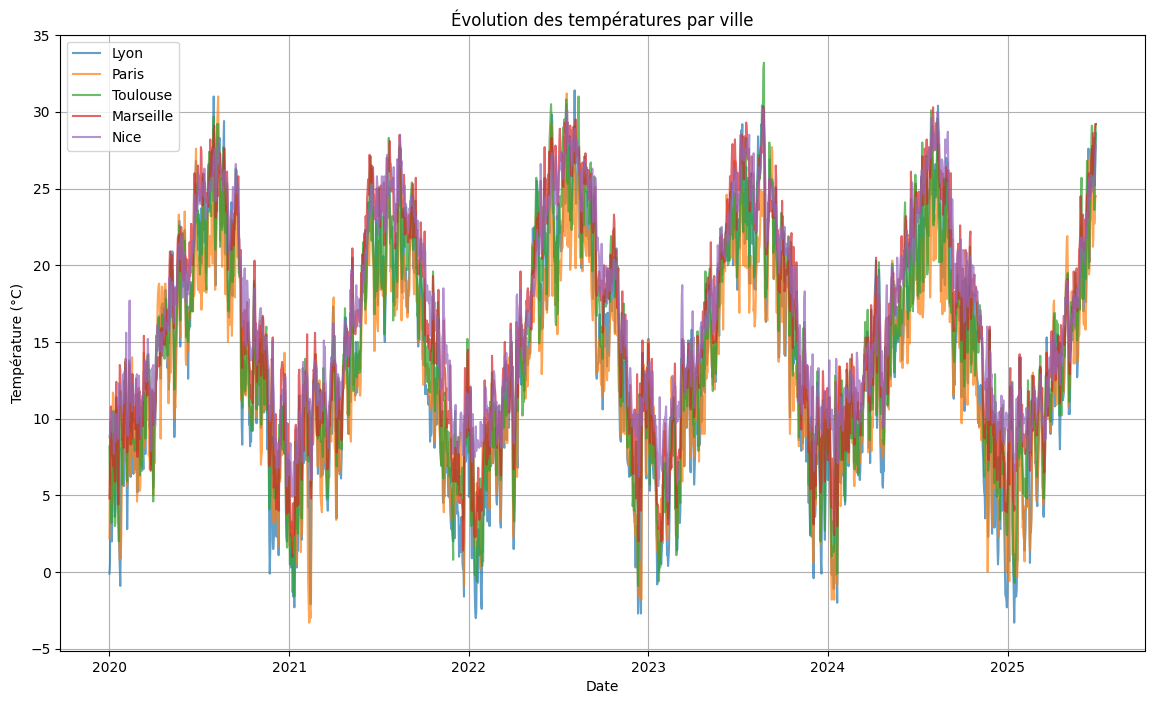

In [55]:
# Température par ville (température moyenne)
plt.figure(figsize=(14, 8))
for ville in df["name"].unique():
    df_ville = df[df["name"] == ville].sort_values("datetime")
    plt.plot(df_ville["datetime"], df_ville["temp"], label=ville, alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.title("Évolution des températures par ville")
plt.legend()
plt.grid(True);

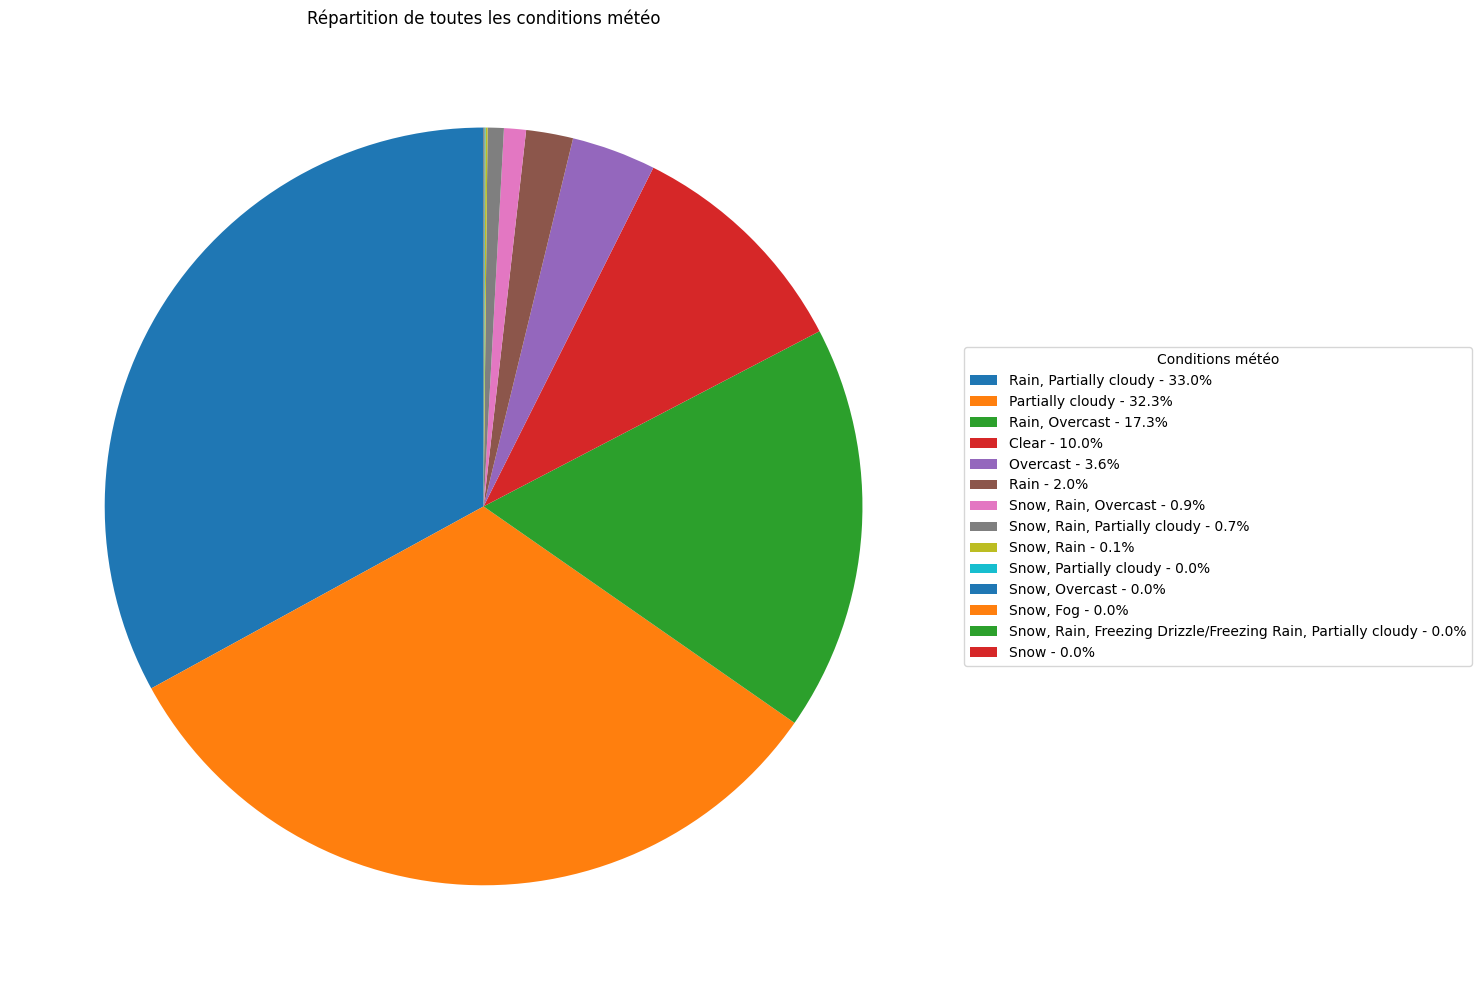

In [64]:
# Toutes les conditions météo
all_conditions = df["conditions"].value_counts()

# Créer le graphique sans labels ni pourcentages
fig, ax = plt.subplots(figsize=(15, 10))
wedges, texts = ax.pie(all_conditions.values, startangle=90)

# Créer les labels avec pourcentages pour la légende
percentages = (all_conditions.values / all_conditions.sum()) * 100
legend_labels = [f"{condition} - {percent:.1f}%" for condition, percent in zip(all_conditions.index, percentages)]

# Créer la légende avec les couleurs correspondantes
ax.legend(wedges, legend_labels, title="Conditions météo", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Répartition de toutes les conditions météo")
plt.tight_layout()